## Pre-processing

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [26]:
stroke_data = pd.read_csv('data/healthcare-dataset-stroke-data.csv', encoding='unicode_escape')
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Questions to ask:
- Male/Female who has more strokes.
- People of which age group are more likely to get a stroke.
- Is hypertension a cause?

### Check info of dataset

In [27]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


So far we have 5110 rows and 12 columns. It seems that we have some missing data.

In [28]:
stroke_data. describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


`Observation`
- The average is 43
- Average glucose level is 106 (can be useful later).

### Data Cleaning

In [29]:
# The id column is not relevant
stroke_data.drop(columns=['id'],inplace=True) 

In [30]:
stroke_data.duplicated().sum()

0

In [31]:
stroke_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [32]:
# Filled missing bmi with average
stroke_data.fillna({"bmi":stroke_data['bmi'].mean().round(1)}, inplace=True)

In [33]:
stroke_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [34]:
# drop 1 patient with other for gender 
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [35]:
print(stroke_data[stroke_data['gender']=='Other'].index.values)

[3116]


In [36]:
stroke_data = stroke_data.drop(3116)
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

Use describe() to show details of data, make sure that there is nothing out of the ordinary in this data set

In [37]:
stroke_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894774,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Outliers Handling

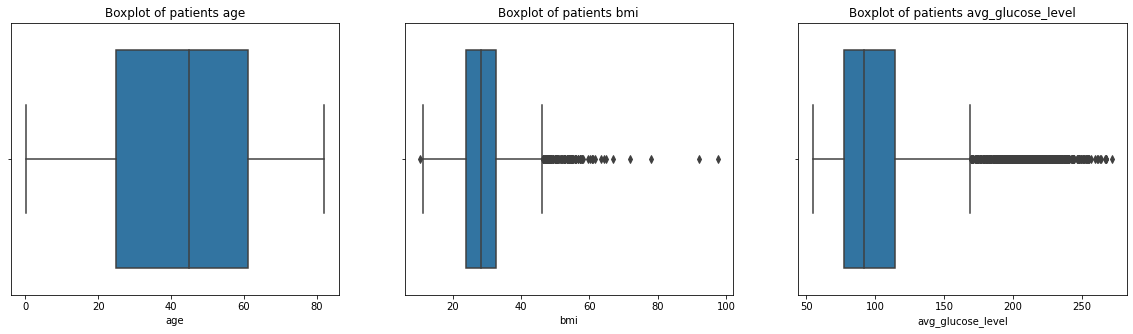

In [59]:
num_cols = ['age', 'bmi', 'avg_glucose_level']

plt.figure(figsize=(20, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=stroke_data[num_cols[i]])
    plt.title('Boxplot of patients %s' %(num_cols[i]))
    plt.xlabel(num_cols[i])
    
plt.show()

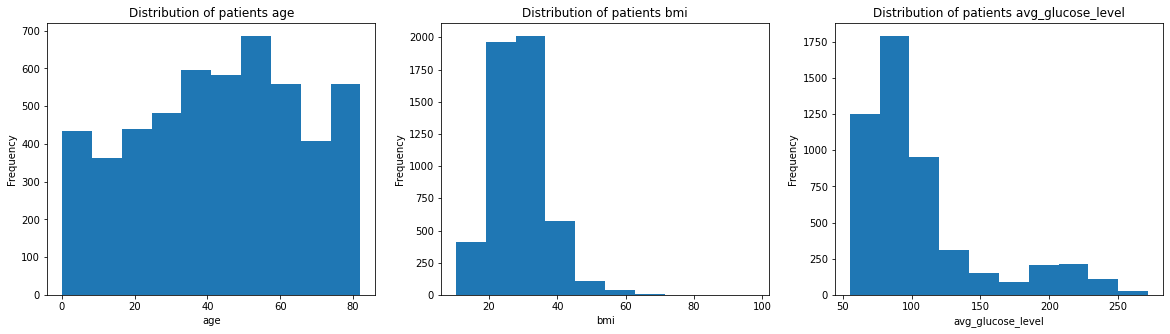

In [58]:
plt.figure(figsize=(20, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    stroke_data[num_cols[i]].plot(kind='hist')
    plt.title('Distribution of patients %s' %(num_cols[i]))
    plt.xlabel(num_cols[i])
    
plt.show()

## EDA

In [38]:
sns.violinplot(data=stroke, x='heart_disease', y='age')

NameError: name 'stroke' is not defined

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.

Can see that people of older age have heart disease, meanwhile the amount of younger people without heart disease is greater.

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

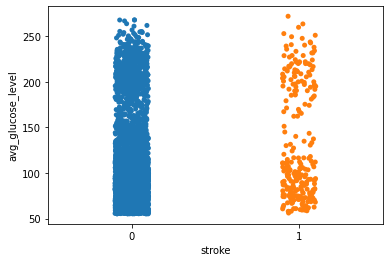

In [ ]:
sns.stripplot(data=stroke, x='stroke', y='avg_glucose_level')

stroke: 1 if the patient had a stroke or 0 if not The amount of people with a glucose level around 150 seem to have the least amount of strokes

### Prepare data

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
stroke.head()

In [ ]:
stroke['gender'] = stroke['gender'].replace({'Male': 0, 'Female': 1})

In [ ]:
replacement_dictionary = {'never smoked':0, 'Unknown':1, 'formerly smoked':2, 'smokes':3}
stroke['smoking_status'].replace(replacement_dictionary, inplace=True)

In [ ]:
X = stroke.drop(columns=['stroke'])
y = stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.6,2
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,0
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.5,0
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.4,3
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,Yes,Private,Urban,83.75,28.9,0
5106,44873,1,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,0
5107,19723,1,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,0
5108,37544,0,51.0,0,0,Yes,Private,Rural,166.29,25.6,2


In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
categorical_pipe = make_pipeline(freq_imputer, ohe)

number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

In [ ]:
preprocessor = make_column_transformer(number_tuple, category_tuple)

In [ ]:
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Solving Imbalance

In [ ]:
!pip3 install imblearn

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
under_sampler = RandomUnderSampler()
under_sample_pipe = make_sampler_pipeline(scaler, under_sampler)
X_train_under, y_train_under = under_sample_pipe.fit_resample(X_train_processed, y_train)

## Tune Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create and visualize our parameter grid
param_grid = {'max_depth': [1,2,3], 'min_samples_leaf': [3,15,20], 'min_samples_split': [2, 10, 100]}
pd.DataFrame(param_grid).T

,0,1,2
max_depth,1,2,3
min_samples_leaf,3,15,20
min_samples_split,2,10,100


In [ ]:
model = DecisionTreeClassifier()
param_grid = {'max_depth': [1,2,3], 'min_samples_leaf': [3,15,20], 'min_samples_split': [2, 10, 100]}

In [ ]:
dt_grid_search = GridSearchCV(model, param_grid)
dt_grid_search.fit(X_train_under, y_train_under)
y_pred = dt_grid_search.predict(X_test_processed)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.65      0.79      1198
           1       0.14      0.85      0.24        80

    accuracy                           0.67      1278
   macro avg       0.56      0.75      0.51      1278
weighted avg       0.93      0.67      0.75      1278



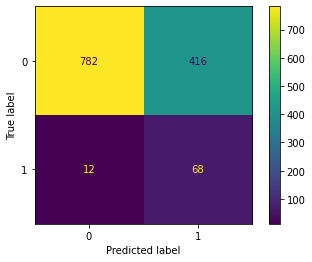

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

DecisionTreeClassifier

In [ ]:
#starting at 2
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=5)
dec_tree.fit(X_train_under, y_train_under)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
dec_pred = dec_tree.predict(X_test_processed)
train_score = dec_tree.score(X_train_under, y_train_under)
test_score = dec_tree.score(X_test_processed, y_test)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.8757396449704142
Test Score: 0.6713615023474179


In [ ]:
print(classification_report(y_test, dec_pred))

              precision    recall  f1-score   support

           0       0.98      0.67      0.79      1198
           1       0.13      0.76      0.23        80

    accuracy                           0.67      1278
   macro avg       0.55      0.71      0.51      1278
weighted avg       0.92      0.67      0.76      1278



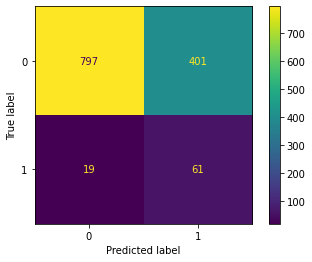

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, dec_pred)